# Pixelated Metrics - Logins combined

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_run(users, emails):
    filename = '{}users-{}emails.txt'.format(users, emails)
    with open(filename) as f:
        entries = f.readlines()
    entries = [entry.split() for entry in entries]
    entries = [entry for entry in entries if entry[0] != 'Unknown']
    last_user = entries[-1][0]
    entries = filter(lambda x: x[0] == last_user, entries)
    run = {}
    for _, key, value in entries:
        value = float(value)
        run.setdefault(key, []).append(value)
    return run

In [3]:
metrics = {}
for users in [1, 5, 10, 25, 50]:
    for key, value in get_run(users, 0).items():
        metrics.setdefault(key, []).append(np.median(value))

**The tests with 50 users have 3 more metrics that we need to remove so we can plot the graphic.**

**We should fix this later**

In [4]:
for key, value in metrics.items():
    if len(value) == 1:
        print key
        del metrics[key]

In [5]:
metrics = sorted(metrics.items(), key=lambda x: max(x[1]), reverse=True)

In [6]:
def plot_logins(metrics, filename, omit_tiny_metrics=False):
    plt.figure()
    plt.ylabel('Seconds')
    plt.xlabel('Users')
    plt.xticks((1, 5, 10, 25, 50))
    
    max_value = max([max(value) for key, value in metrics])
    for key, value in metrics:
        if not omit_tiny_metrics or max(value) > max_value/10:
            plt.plot([1, 5, 10, 25, 50], value, label=key)    

    plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
    plt.savefig(filename + '.png', bbox_inches='tight')

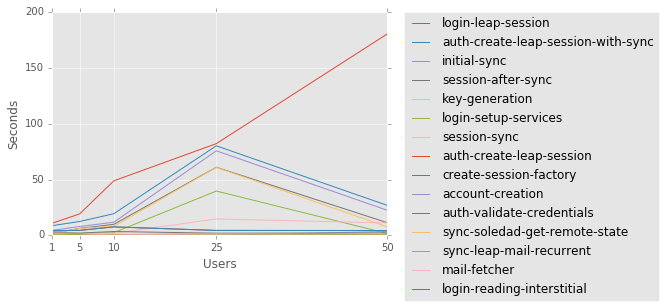

In [7]:
plot_logins(metrics, 'pictures/login-last-user', omit_tiny_metrics=False)

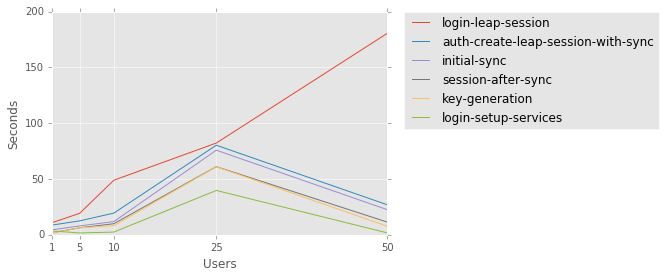

In [8]:
plot_logins(metrics, 'pictures/login-last-user-2', omit_tiny_metrics=True)